In [1]:
from PIL import Image
import os

In [25]:
from keras.optimizers import Adam

from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Conv2D
from keras.layers import Reshape, Flatten, Input, Activation, Conv2DTranspose
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
class DCGAN:
    def __init__(self):
        self.img_rows = 95
        self.img_cols = 67
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        
        self.gan = Sequential()
        
        self.discriminator.trainable = False
        
        self.gan.add(self.generator)
        self.gan.add(self.discriminator)
        
        optimizer = Adam(lr=0.00015, beta_1=0.5)
        self.gan.compile(loss='binary_crossentropy', optimizer=optimizer,
                metrics=None)
        
    def build_generator(self):        
        model = Sequential()
        
        model.add(Dense(
            units = 4 * 4 * 512,
            kernel_initializer = 'glorot_uniform',
            input_shape = (1, 1, 100))
        )
        model.add(Reshape(target_shape=(4, 4, 512)))
        model.add(BatchNormalization(momentum=0.5))
        model.add(Activation('relu'))
        
        model.add(Conv2DTranspose(
            filters = 256, kernel_size = (5,5),
            strides = (2, 2), padding = 'same',
            data_format = 'channels_last',
            kernel_initializer='glorot_uniform'
        ))
        model.add(BatchNormalization(momentum=0.5))
        model.add(Activation('relu'))
        
        model.add(Conv2DTranspose(
            filters = 128, kernel_size = (5,5),
            strides = (2, 2), padding = 'same',
            data_format = 'channels_last',
            kernel_initializer='glorot_uniform'
        ))
        model.add(BatchNormalization(momentum=0.5))
        model.add(Activation('relu'))
        
        model.add(Conv2DTranspose(
            filters = 64, kernel_size = (5,5),
            strides = (2, 2), padding = 'same',
            data_format = 'channels_last',
            kernel_initializer='glorot_uniform'
        ))
        model.add(BatchNormalization(momentum=0.5))
        model.add(Activation('relu'))
        
        model.add(Conv2DTranspose(
            filters = 3, kernel_size = (5,5),
            strides = (2, 2), padding = 'same',
            data_format = 'channels_last',
            kernel_initializer='glorot_uniform'
        ))
        model.add(Activation('tanh'))
        
        optimizer = Adam(lr=0.00015, beta_1=0.5)
        model.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=None)
        return model
    
    def build_discriminator(self):
        img_shape = (self.img_rows, self.img_cols, self.channels)
        
        model = Sequential()
        
        model.add(Conv2D(filters=64, kernel_size=(5, 5),
                        strides = (2, 2), padding = 'same',
                        data_format = 'channels_last',
                        kernel_initializer = 'glorot_uniform',
                        input_shape = img_shape))
        model.add(BatchNormalization(momentum=0.5))
        model.add(LeakyReLU(0.2))
        
        model.add(Conv2D(filters=128, kernel_size=(5, 5),
                        strides = (2, 2), padding = 'same',
                        data_format = 'channels_last',
                        kernel_initializer = 'glorot_uniform'))
        model.add(BatchNormalization(momentum=0.5))
        model.add(LeakyReLU(0.2))
        
        model.add(Conv2D(filters=256, kernel_size=(5, 5),
                        strides = (2, 2), padding = 'same',
                        data_format = 'channels_last',
                        kernel_initializer = 'glorot_uniform'))
        model.add(BatchNormalization(momentum=0.5))
        model.add(LeakyReLU(0.2))
        
        model.add(Conv2D(filters=512, kernel_size=(5, 5),
                        strides = (2, 2), padding = 'same',
                        data_format = 'channels_last',
                        kernel_initializer = 'glorot_uniform'))
        model.add(BatchNormalization(momentum=0.5))
        model.add(LeakyReLU(0.2))
        
        model.add(Flatten())
        model.add(Dense(1))
        model.add(Activation('sigmoid'))
        
        optimizer = Adam(lr=0.0002, beta_1=0.5)
        model.compile(loss='binary_crossentropy',
                          optimizer=optimizer,
                          metrics=None)
        
        return model
    
    
    
    def train(self, directory, epochs, batch_size):
        images = []
        
        for img_name in os.listdir(directory):
            if 'png' in img_name:
                images.append(np.array(Image.open(os.path.join(directory, img_name))))
        
        images = np.array([img / 255.0 for img in images])
        
        num_images = images.shape[0]
        
        number_of_batches = int(num_images / batch_size)
        
        adversarial_loss = np.empty(shape = 1)
        discriminator_loss = np.empty(shape = 1)
        batches = np.empty(shape = 1)
        
        plt.ion()
        
        current_batch = 0
        
        for epoch in range(epochs):
            print('Epoch ' + str(epoch + 1) + '/' + str(epochs) + ' :')
            
            for batch_number in range(number_of_batches):
                real_images = images[batch_number*batch_size:(batch_number + 1)*batch_size]
                
                current_batch_size = real_images.shape[0]
                
                noise = np.random.normal(0, 1, 
                                         size = (current_batch_size,) + (1, 1, 100))
                generated_images = self.generator.predict(noise)
                
                plt.imshow((generated_images[0] * 255).astype(np.uint8))
                
                
            
    

In [58]:
gan = DCGAN()

Epoch 1/1 :


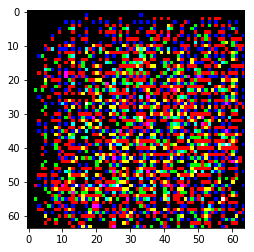

In [59]:
gan.train('./Shoe Images', epochs=1, batch_size=20)